<a href="https://colab.research.google.com/github/yul77/Review/blob/main/HMLLM/%ED%9C%B4%EB%A8%BC_LLM%EC%88%98%EC%97%85_4%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Part1.day4 : Seq2seq Modeling

### Seq2Seq Modeling

**Seq2Seq(Sequence-to-Sequence)** 모델은 하나의 시퀀스를 입력으로 받아 다른 시퀀스를 출력하는 **신경망 모델**입니다. 주로 자연어 처리(NLP)에서 사용되며, 번역, 요약, 대화 생성 등 다양한 작업에서 중요한 역할을 합니다. Seq2Seq 모델은 입력 시퀀스를 고정된 길이의 **벡터 표현**으로 인코딩한 후, 디코딩하여 출력 시퀀스를 생성합니다.

>> 시큐투시퀀스.
>> 문자-> 숫자로 바꿀때 원핫 인코딩과 임베딩을 사용하는데 원핫인코딩은 성능이 너무 떨어지므로 임베딩 사용 권장. 임베딩(워드 투 벡터 / 버트)
>> 공부할때 제일 중요한건 RAG. 성능을 좌우한다.



### Seq2Seq의 주요 구성 요소

1. **인코더(Encoder)**
    - 인코더는 입력 시퀀스를 받아 이를 **고차원 벡터**로 변환합니다. 이 벡터는 입력 시퀀스의 중요한 정보를 압축하여 담고 있습니다.
    - 인코더는 일반적으로 **RNN(Recurrent Neural Network)**, **LSTM(Long Short-Term Memory)**, **GRU(Gated Recurrent Unit)** 또는 **Transformer** 기반의 구조로 구성됩니다.
    >> 시퀀스 안에 트랜스 포머가 들어가는것. 다만 트랜스포머는 인코더가 버트.디코더가 지피티 인것.

    >> RNN < LSTM < GRU
    - 예를 들어, 영어 문장을 인코더에 입력하면 이 문장의 의미를 담고 있는 고정된 크기의 벡터로 변환됩니다.
2. **디코더(Decoder)**
    - 디코더는 인코더에서 전달받은 벡터 표현을 입력으로 받아 **출력 시퀀스**를 생성합니다.
    - 디코더 역시 RNN, LSTM, GRU 또는 Transformer 구조로 구성될 수 있으며, 이 구조는 인코더와 연결되어 있습니다.
    >> Seq2Seq는 아버지/ 트랜스포머는 아들이라고 보면 됨.
    >> 한가지 차이점은 트랜스포머는 생성형 모델이 들어가있음.(= gpt)
    - 출력은 단어 단위로 생성되며, 이전에 생성된 단어들을 참고하여 다음 단어를 예측합니다.

### Seq2Seq 모델의 학습 과정

1. **학습 데이터 준비**
    - Seq2Seq 모델은 입력 시퀀스와 해당 시퀀스에 대응하는 출력 시퀀스로 구성된 데이터셋을 필요로 합니다. 예를 들어, 영어 문장과 그에 대응하는 한국어 번역 문장 쌍이 학습 데이터가 될 수 있습니다.
2. **인코딩 단계**
    - 입력 시퀀스는 인코더를 통해 처리되고, 이로부터 **컨텍스트 벡터(context vector)** 또는 **인코딩 벡터**가 생성됩니다. 이 벡터는 입력 시퀀스의 전체 의미를 압축한 것입니다.
3. **디코딩 단계**
    - 디코더는 인코더로부터 전달된 벡터를 기반으로 출력 시퀀스를 생성합니다. 처음에는 시작 토큰 `<SOS>`로 시작하고, 이후 단어를 하나씩 생성하며 출력 시퀀스를 만들어 나갑니다.
    >> Seq2Seq
    - 각 시점에서의 출력은 다음 시점의 입력으로 사용되며, 마지막에는 종료 토큰 `<EOS>`가 생성되면 출력이 종료됩니다.

### Seq2Seq의 문제점과 해결책

1. **고정된 벡터 표현의 한계**
    - 초기의 Seq2Seq 모델은 인코더가 입력 시퀀스 전체를 **고정된 크기의 벡터**로 압축한 후 디코더로 전달합니다. 긴 시퀀스의 경우 정보를 잃을 위험이 있어 **성능 저하**가 발생할 수 있습니다.
2. **어텐션 메커니즘(Attention Mechanism)**
    - *어텐션(Attention)**은 Seq2Seq 모델의 성능을 대폭 개선한 방법입니다.
    - 어텐션 메커니즘은 디코더가 출력 시퀀스를 생성할 때, 인코더의 모든 숨겨진 상태를 참조하도록 하여 특정 시점에서 입력의 어떤 부분에 더 집중해야 하는지 판단하게 합니다. 이를 통해 긴 문장을 처리할 때 정보 손실을 줄일 수 있습니다.
    - 어텐션을 사용하는 Transformer 모델이 기존의 Seq2Seq RNN 기반 모델보다 더 좋은 성능을 보이며, 특히 번역 작업에서 널리 사용됩니다.

### Transformer 기반 Seq2Seq 모델

**Transformer**는 RNN 구조를 사용하지 않고 완전히 **어텐션 메커니즘**을 기반으로 하는 Seq2Seq 모델입니다. Transformer는 인코더와 디코더로 구성되며, 각 부분에서 자기 어텐션(Self-Attention)과 **포지션-와이즈 피드포워드 네트워크**를 사용합니다.

- **인코더**는 입력 시퀀스를 여러 레이어의 자기 어텐션과 피드포워드 네트워크를 통해 변환하여 입력의 중요한 특징을 추출합니다.
- **디코더**는 인코더에서 받은 인코딩 결과와 이전에 생성한 출력 단어들을 참조하여 새로운 단어를 생성합니다.
- Transformer의 가장 큰 장점은 모든 단어에 대해 병렬 처리가 가능하다는 것입니다. 이는 모델의 **학습 속도**와 **성능**을 크게 향상시킵니다.

### Seq2Seq 모델의 응용

1. **기계 번역(Machine Translation)**
    - 입력 문장을 다른 언어로 번역하는 작업에서 Seq2Seq 모델이 사용됩니다. 예를 들어, 영어 문장을 한국어로 번역하는 경우, 인코더는 영어 문장을 이해하고, 디코더는 이 정보를 바탕으로 한국어 문장을 생성합니다.
2. **텍스트 요약(Text Summarization)**
    - 긴 문서를 요약하는 작업에서도 Seq2Seq 모델이 사용됩니다. 인코더는 긴 입력 문서의 중요한 정보를 압축하고, 디코더는 이를 바탕으로 간결한 요약을 생성합니다.
3. **질문 답변(Question Answering)**
    - 질문을 입력으로 받아 해당하는 답변을 생성하는 작업에서도 Seq2Seq 모델을 사용할 수 있습니다.
4. **대화 생성(Dialogue Generation)**
    - 사용자의 입력을 받아 적절한 응답을 생성하는 챗봇과 같은 시스템에도 Seq2Seq 모델이 사용됩니다.
    

---

- **Seq2Seq 모델**은 하나의 시퀀스를 다른 시퀀스로 변환하는 데 특화된 모델로, 인코더와 디코더라는 두 가지 주요 구성 요소로 이루어져 있습니다.
- **Transformer**는 Seq2Seq의 한 종류로, 어텐션 메커니즘을 사용하여 더 나은 성능을 발휘합니다.
- Seq2Seq 모델은 자연어 처리에서 번역, 요약, 대화 생성 등 다양한 작업에 사용되며, 특히 어텐션 메커니즘의 도입으로 긴 시퀀스를 처리하는 능력이 크게 향상되었습니다.

In [ ]:
# Transformer seq2seq 를 이용한 영어 한국어 번역
# Seq2Seq 모델은 성능이 상당히 안좋은 편. 그 중 그나마 나은게 트랜스포머라 한번 시도만 해본다.

from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

# M2M100 모델 및 토크나이저 불러오기 / Load M2M100 model and tokenizer
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

# 영어 문장을 한국어로 번역하는 함수 / Function to Translate English to Korean
def translate_english_to_korean(text):
    tokenizer.src_lang = "en"  # 원본 언어를 영어로 설정 / Set source language to English
    inputs = tokenizer(text, return_tensors="pt")

    # 번역된 토큰 생성 / Generate translated tokens
    generated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id("ko"))

    # 번역된 텍스트 디코딩 / Decode translated text
    translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
    return translated_text

# 번역 실행 / Execute Translation
if __name__ == "__main__":
    english_text = "The greatest glory in living lies not in never falling, but in rising every time we fall. ."

    # 번역 결과 출력 / Output Translation
    translated_text = translate_english_to_korean(english_text)
    print("Input English Sentence:", english_text)
    print("Translated Korean Sentence:", translated_text)

In [ ]:
# 텍스트 요약 예시

from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

# KoBART 모델 및 토크나이저 불러오기 / Load KoBART model and tokenizer
model_name = "gogamza/kobart-summarization"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# 한국어 텍스트를 요약하는 함수 / Function to Summarize Korean Text
def summarize_korean_text(text):
    # 입력 텍스트 토크나이징 / Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)

    # 요약 생성 / Generate summary  - RAG에서 많이 쓰일 것.
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=100,               # 요약된 텍스트의 최대 길이를 줄임 : 문서를 구분할 때 상당히 중요.
        num_beams=4,                  # 빔 서치
        repetition_penalty=3.0,       # 반복 방지 벌점 설정.
        length_penalty=1.5,           # 길이 패널티 설정
        no_repeat_ngram_size=3,       # 3-그램 반복 방지 설정
        early_stopping=True,
        temperature=0.7               # 온도 설정을 낮게 조절
    )

    # 요약된 텍스트 디코딩 / Decode summarized text
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary_text

# 요약 실행 / Execute Summary
if __name__ == "__main__":
    korean_text = (
        "오늘 날씨가 정말 좋습니다. 저는 공원에서 산책을 하고 싶습니다. "
        "어제는 비가 많이 와서 공원에 가지 못했지만, 오늘은 맑은 하늘과 따뜻한 온도 덕분에 기분이 좋습니다."
    )

    # 요약 결과 출력 / Output Summary
    summarized_text = summarize_korean_text(korean_text)
    print("Input Korean Text:", korean_text)
    print("Summarized Korean Text:", summarized_text)


In [ ]:
# KoBart 모델을 이용한 치킨 주문시스템 챗봇 구현
# KoBart는 연습용.
# 챗봇은 의도를 파악하는 것이 중요함.
# 규칙 기반은 정확할 수 있지만 학습 외에는 답변을 받을 수 없음 // 학습 기반은 정확도는 떨어지지만 유연함


from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration
import random

# KoBART 모델 및 토크나이저 불러오기 / Load KoBART model and tokenizer
model_name = "gogamza/kobart-summarization"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# 치킨집 주문 처리 챗봇 / Chicken Shop Order Processing Chatbot
def chicken_order_chatbot(user_input):
    # 사용자가 요청한 주문 정보 처리 / Process user's order request
    if "가격" in user_input or "비용" in user_input or "얼마" in user_input:
        return check_price(user_input)
    elif any(word in user_input for word in ["메뉴", "추천", "치킨 종류"]):
        return recommend_menu()
    elif any(word in user_input for word in ["주문", "시키다", "배달"]):
        return process_order(user_input)
    elif any(word in user_input for word in ["배달", "배송", "배달 가능"]):
        return "네, 배달이 가능합니다. 주문하실 치킨 종류를 말씀해 주세요."
    else:
        # KoBART 모델을 사용하여 응답 생성 / Generate response using KoBART for other questions
        return generate_response_with_kobart(user_input)

# 메뉴 추천 기능 / Recommend Menu
def recommend_menu():
    menu = ["후라이드 치킨", "양념 치킨", "반반 치킨", "간장 치킨", "허니 갈릭 치킨"]
    return f"저희 추천 메뉴는 {random.choice(menu)}입니다. 어떤 치킨을 주문하시겠어요?"

# 가격 확인 기능 / Check Price
def check_price(order_text):
    # 가격 정보 딕셔너리 / Price information dictionary
    prices = {
        "후라이드": 15000,
        "양념": 16000,
        "반반": 16000,
        "간장": 17000,
        "허니 갈릭": 18000
    }

    for chicken, price in prices.items():
        if chicken in order_text:
            # 주문 개수 파악 / Detect the number of orders
            count = 1  # 기본 1마리로 가정 / Default to 1 chicken
            words = order_text.split()
            for word in words:
                if "마리" in word:
                    try:
                        count = int(word.replace("마리", ""))
                    except ValueError:
                        pass

            total_price = price * count
            return f"{chicken} 치킨 {count}마리의 가격은 {total_price:,}원입니다."

    return "주문 가능한 치킨의 종류는 후라이드, 양념, 반반, 간장, 허니 갈릭입니다."

# 주문 처리 기능 / Process Order
def process_order(order_text):
    chicken_types = ["후라이드", "양념", "반반", "간장", "허니 갈릭"]
    for chicken in chicken_types:
        if chicken in order_text:
            return f"{chicken} 치킨을 주문하셨습니다. 배달 주소와 전화번호를 알려주세요."
    return "주문하실 치킨 종류를 다시 말씀해 주세요."

# KoBART를 사용하여 응답 생성 / Generate response using KoBART
def generate_response_with_kobart(user_input):
    # 입력 텍스트 토크나이징 / Tokenize input text
    inputs = tokenizer(user_input, return_tensors="pt", max_length=1024, truncation=True)

    # 응답 생성 / Generate response
    response_ids = model.generate(
        inputs['input_ids'],
        max_length=100,
        num_beams=4,
        repetition_penalty=3.0,   # 반복 방지 벌점 설정 / Set repetition penalty
        length_penalty=1.0,
        no_repeat_ngram_size=3,   # 3-그램 반복 방지 설정 / Set n-gram repeat prevention
        early_stopping=True,
        temperature=0.7           # 온도 설정 / Set temperature for diversity in generation
    )

    # 생성된 응답 디코딩 / Decode generated response
    response_text = tokenizer.decode(response_ids[0], skip_special_tokens=True)
    return response_text

# 챗봇 실행 / Run Chatbot
if __name__ == "__main__":
    print("안녕하세요! 치킨 주문을 도와드리겠습니다. 질문이 있으시면 말씀해주세요.")
    while True:
        user_input = input("사용자: ")
        if user_input.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        response = chicken_order_chatbot(user_input)
        print("챗봇:", response)

In [ ]:
from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration
import random

# KoBART 모델 및 토크나이저 불러오기 / Load KoBART model and tokenizer
model_name = "gogamza/kobart-summarization"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# 카페 주문 처리 챗봇 / Coffee Shop Order Processing Chatbot
def coffee_order_chatbot(user_input):
    # 사용자가 요청한 주문 정보 처리 / Process user's order request
    if "가격" in user_input or "비용" in user_input or "얼마" in user_input:
        return check_price(user_input)
    elif any(word in user_input for word in ["메뉴", "추천", "음료 종류"]):
        return recommend_menu()
    elif any(word in user_input for word in ["주문", "시키다", "배달"]):
        return process_order(user_input)
    elif any(word in user_input for word in ["배달", "배송", "배달 가능"]):
        return "네, 배달이 가능합니다. 주문하실 음료 종류를 말씀해 주세요."
    else:
        # KoBART 모델을 사용하여 응답 생성 / Generate response using KoBART for other questions
        return generate_response_with_kobart(user_input)

# 메뉴 추천 기능 / Recommend Menu
def recommend_menu():
    menu = ["아이스 아메리카노", "아메리카노", "라떼", "핫초코", "딸기스무디"]
    return f"저희 추천 메뉴는 {random.choice(menu)}입니다. 어떤 음료를 주문하시겠어요?"

# 가격 확인 기능 / Check Price
def check_price(order_text):
    # 가격 정보 딕셔너리 / Price information dictionary
    prices = {
        "아이스 아메리카노": 2000,
        "아메리카노": 1500,
        "라떼": 4500,
        "핫초코": 5600,
        "딸기 스무디": 6500
    }

    total_price = 0  # 총 가격 변수 초기화
    order_summary = []  # 주문 내역 리스트 초기화

    for coffee, price in prices.items():
        # 음료가 주문에 포함되어 있는지 확인
        if coffee in order_text:
            # 주문 개수 파악 / Detect the number of orders
            count = 1  # 기본 1잔으로 가정 / Default to 1 coffee
            words = order_text.split()
            for word in words:
                if "잔" in word:
                    try:
                        count = int(word.replace("잔", ""))
                    except ValueError:
                        pass

            total_price += price * count  # 총 가격에 추가
            order_summary.append(f"{coffee} {count}잔의 가격은 {price * count:,}원입니다.")  # 주문 내역 추가

    if total_price > 0:
        return f"주문 내역:\n" + "\n".join(order_summary) + f"\n총 가격은 {total_price:,}원입니다."

    return "주문 가능한 음료의 종류는 아이스 아메리카노, 아메리카노, 라떼, 핫초코, 딸기 스무디 입니다."

# 주문 처리 기능 / Process Order
def process_order(order_text):
    coffee_types = ["아이스 아메리카노", "아메리카노", "라떼", "핫초코", "딸기 스무디"]
    for coffee in coffee_types:
        if coffee in order_text:
            count = 1  # 기본 1잔으로 가정 / Default to 1 coffee
            words = order_text.split()
            for word in words:
                if "잔" in word:
                    try:
                        count = int(word.replace("잔", ""))
                    except ValueError:
                        pass
            return f"{coffee} {count}잔을 주문하셨습니다. 배달 주소와 전화번호를 알려주세요."
    return "주문하실 음료 종류를 다시 말씀해 주세요."

# KoBART를 사용하여 응답 생성 / Generate response using KoBART
def generate_response_with_kobart(user_input):
    # 입력 텍스트 토크나이징 / Tokenize input text
    inputs = tokenizer(user_input, return_tensors="pt", max_length=1024, truncation=True)

    # 응답 생성 / Generate response
    response_ids = model.generate(
        inputs['input_ids'],
        max_length=100,
        num_beams=4,
        repetition_penalty=3.0,   # 반복 방지 벌점 설정 / Set repetition penalty
        length_penalty=1.0,
        no_repeat_ngram_size=3,   # 3-그램 반복 방지 설정 / Set n-gram repeat prevention
        early_stopping=True,
        temperature=0.7           # 온도 설정 / Set temperature for diversity in generation
    )

    # 생성된 응답 디코딩 / Decode generated response
    response_text = tokenizer.decode(response_ids[0], skip_special_tokens=True)
    return response_text

# 챗봇 실행 / Run Chatbot
if __name__ == "__main__":
    print("안녕하세요! 음료 주문을 도와드리겠습니다. 질문이 있으시면 말씀해주세요.")
    while True:
        user_input = input("사용자: ")
        if user_input.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        response = coffee_order_chatbot(user_input)
        print("챗봇:", response)


In [ ]:
# 다음은 KoBart 모델을 이용한 기차표 주문시스템 챗봇의 구현입니다.

import pandas as pd
import re
from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

# KoBART 모델 및 토크나이저 불러오기 / Load KoBART model and tokenizer
model_name = "gogamza/kobart-summarization"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# 다양한 기차 및 거리별 요금 데이터 / Train types and fare data
train_data = {
    "출발지": ["서울", "서울", "서울", "대전", "대전", "부산", "부산", "광주"],
    "도착지": ["대전", "부산", "광주", "부산", "광주", "서울", "대전", "서울"],
    "거리(km)": [150, 400, 300, 250, 180, 400, 250, 300],
    "KTX 요금(원)": [20000, 50000, 35000, 30000, 25000, 50000, 30000, 35000],
    "무궁화호 요금(원)": [10000, 25000, 20000, 18000, 15000, 25000, 18000, 20000],
    "새마을호 요금(원)": [15000, 35000, 30000, 25000, 20000, 35000, 25000, 30000]
}
train_df = pd.DataFrame(train_data)

# 기차 요금 조회 기능 / Function to Get Train Fare
def get_train_fare(user_input):
    # 사용자의 입력에서 출발지, 도착지, 기차 종류를 추출 / Extract departure, arrival, and train type from user input
    pattern = r"(\w+)에서 (\w+)까지 (\w+) 요금"
    match = re.search(pattern, user_input)

    if match:
        departure = match.group(1)
        arrival = match.group(2)
        train_type = match.group(3).upper()  # 기차 종류를 대문자로 변환 / Convert train type to uppercase

        # 기차 종류에 맞는 열 이름 찾기 / Find the correct fare column based on train type
        fare_column = ""
        if train_type == "KTX":
            fare_column = "KTX 요금(원)"
        elif train_type == "무궁화호":
            fare_column = "무궁화호 요금(원)"
        elif train_type == "새마을호":
            fare_column = "새마을호 요금(원)"
        else:
            return "KTX, 무궁화호, 새마을호 중 하나를 선택해 주세요."

        # 데이터프레임에서 출발지, 도착지에 해당하는 요금을 찾기 / Find the fare in the dataframe
        result = train_df[(train_df['출발지'] == departure) & (train_df['도착지'] == arrival)]

        if not result.empty:
            distance = result.iloc[0]['거리(km)']
            fare = result.iloc[0][fare_column]
            return f"{departure}에서 {arrival}까지의 거리는 {distance}km이며, {train_type} 요금은 {fare:,}원입니다."
        else:
            return "해당 경로에 대한 요금 정보를 찾을 수 없습니다. 출발지와 도착지를 다시 확인해 주세요."
    else:
        return generate_response_with_kobart(user_input)

# KoBART를 사용하여 응답 생성 / Generate response using KoBART
def generate_response_with_kobart(user_input):
    # 입력 텍스트 토크나이징 / Tokenize input text
    inputs = tokenizer(user_input, return_tensors="pt", max_length=1024, truncation=True)

    # 응답 생성 / Generate response
    response_ids = model.generate(
        inputs['input_ids'],
        max_length=100,
        num_beams=4,
        repetition_penalty=3.0,   # 반복 방지 벌점 설정 / Set repetition penalty
        length_penalty=1.0,
        no_repeat_ngram_size=3,   # 3-그램 반복 방지 설정 / Set n-gram repeat prevention
        early_stopping=True,
        temperature=0.7           # 온도 설정 / Set temperature for diversity in generation
    )

    # 생성된 응답 디코딩 / Decode generated response
    response_text = tokenizer.decode(response_ids[0], skip_special_tokens=True)
    return response_text

# 챗봇 실행 / Run Chatbot
if __name__ == "__main__":
    print("안녕하세요! 기차 요금을 안내해 드리겠습니다. 출발지와 도착지, 기차 종류를 말씀해 주세요. 예: '서울에서 부산까지 KTX 요금'")
    while True:
        user_input = input("사용자: ")
        if user_input.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        response = get_train_fare(user_input)
        print("챗봇:", response)

In [ ]:
!pip install openai==0.27.0
!pip install transformers

In [ ]:
# M2M100을 사용해 영어 문장을 한국어로 번역한 후, gpt-3.5-turbo를 사용해 번역의 자연스러움을 개선.


from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
import openai
import os


openai.api_key = ''

# M2M100 모델 및 토크나이저 불러오기 / Load M2M100 model and tokenizer
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

# 영어를 한국어로 번역하는 함수 / Function to translate English to Korean
def translate_english_to_korean(text):
    tokenizer.src_lang = "en"
    inputs = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id("ko"))
    translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
    return translated_text

# LLM을 사용하여 번역의 자연스러움 개선 / Improve Translation with LLM
def improve_translation_with_llm(text):
    # LLM을 사용하여 자연스러운 번역 생성 / Generate a more natural translation using LLM
    messages = [
        {"role": "system", "content": "You are an assistant that helps improve translations to make them more natural and fluent."},
        {"role": "user", "content": f"Please improve the following Korean translation to make it more natural and fluent:\n\n{text}\n\nImproved Translation:"}
    ]

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", #model="gpt-4"로 변경하면 명령을 정확하게 인지하여 한글로 정상 출력 됨.
        messages=messages,
        max_tokens=150,
        temperature=0.7,
        top_p=1.0,
        n=1
        )


    improved_text = response.choices[0].message['content'].strip()
    return improved_text

# 번역 및 개선 실행 / Execute Translation and Improvement
if __name__ == "__main__":
    # 입력 영어 문장 / Input English Sentence
    english_text = "The weather today is really nice. I'm thinking of going for a walk in the park."

    # 1. M2M100을 사용한 초기 번역 / Initial translation using M2M100
    initial_translation = translate_english_to_korean(english_text)
    print("Input English Sentence:", english_text)
    print("Initial Translation (Korean):", initial_translation)

    # 2. LLM을 사용하여 번역의 자연스러움 개선 / Improve translation using LLM
    improved_translation = improve_translation_with_llm(initial_translation)
    print("Improved Translation (Korean):", improved_translation)

위의 코드를 3.5버전에서는 한글로 변형하라는 명령어를 인지를 못해서 영어로 출력이 되고있다.
model="gpt-4"로 설정을 변경하면 정상적으로 출력이 된다

In [ ]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
import openai
import os


openai.api_key = ''

# M2M100 모델 및 토크나이저 불러오기 / Load M2M100 model and tokenizer
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

# 영어를 한국어로 번역하는 함수 / Function to translate English to Korean
def translate_english_to_korean(text):
    tokenizer.src_lang = "en"
    inputs = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id("ko"))
    translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)
    return translated_text

# LLM을 사용하여 번역의 자연스러움 개선 / Improve Translation with LLM
def improve_translation_with_llm(text):
    # LLM을 사용하여 자연스러운 번역 생성 / Generate a more natural translation using LLM
    messages = [
        {"role": "system", "content": "당신은 번역을 보다 자연스럽고 유창하게 만드는 데 도움을 주는 어시스턴트입니다."},
        {"role": "user", "content": f"다음 한국어 번역을 더 자연스럽고 유창하게 만들어 주세요:\n\n{text}\n\n개선된 번역:"}
    ]

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=150,
        temperature=0.7,
        top_p=1.0,
        n=1
    )

    improved_text = response.choices[0].message['content'].strip()
    return improved_text

# 번역 및 개선 실행 / Execute Translation and Improvement
if __name__ == "__main__":
    # 입력 영어 문장 / Input English Sentence
    english_text = "Hope is the thing with feathers That perches in the soul. And sings the tune Without the words, and never stops at all.."

    # 1. M2M100을 사용한 초기 번역 / Initial translation using M2M100
    initial_translation = translate_english_to_korean(english_text)
    print("Input English Sentence:", english_text)
    print("Initial Translation (Korean):", initial_translation)

    # 2. LLM을 사용하여 번역의 자연스러움 개선 / Improve translation using LLM
    improved_translation = improve_translation_with_llm(initial_translation)
    print("Improved Translation (Korean):", improved_translation)

In [ ]:
import openai

# OpenAI API 키 설정
openai.api_key = ''  # 여기에 본인의 API 키를 입력하세요

# 특정 펜션 정보 데이터
pension_info = {
    "오션뷰 펜션": {
        "위치": "강릉",
        "가격(1박/원)": 150000,
        "예약 가능 여부": "가능",
        "BBQ 가능 여부": "가능",
        "식사 제공 여부": "제공 안 함",
        "전화번호": "010-1234-5678",
        "애완동물 동반 여부": "불가능",
        "방 갯수": 3,
        "편의시설": ["Wi-Fi", "주차", "TV", "냉장고", "에어컨"]
    }
}

# 펜션 정보 질문 처리 함수
def get_pension_response(pension_name, question):
    if pension_name in pension_info:
        pension_details = pension_info[pension_name]

        # 질문에 따라 적절한 정보를 제공
        prompt = f"{pension_name}에 대한 정보입니다: {pension_details}. 사용자 질문: {question}.\n답변:"

        # GPT-3.5 Turbo API 호출
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=150,
            temperature=0.7
        )

        return response['choices'][0]['message']['content'].strip()
    else:
        return "해당 펜션 정보를 찾을 수 없습니다."

# 챗봇 실행
if __name__ == "__main__":
    print("안녕하세요! 펜션에 대한 문의를 도와드리겠습니다.")

    while True:
        # 사용자로부터 펜션 이름과 질문을 입력받음
        pension_name = input("펜션 이름을 입력하세요: ")
        if pension_name.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        user_input = input("사용자 질문을 입력하세요: ")
        if user_input.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        response = get_pension_response(pension_name, user_input)
        print("챗봇:", response)


In [ ]:
import openai

# OpenAI API 키 설정
openai.api_key = ''  # 여기에 본인의 API 키를 입력하세요

# 특정 펜션 정보 데이터
pension_info = {
    "오션뷰 펜션": {
        "위치": "강릉",
        "가격(1박/원)": 150000,
        "예약 가능 여부": "가능",
        "BBQ 가능 여부": "가능",
        "식사 제공 여부": "제공 안 함",
        "전화번호": "010-1234-5678",
        "애완동물 동반 여부": "불가능",
        "방 갯수": 3,
        "편의시설": ["Wi-Fi", "주차", "TV", "냉장고", "에어컨"]
    }
}

# 펜션 정보 질문 처리 함수
def get_pension_response(pension_name, question):
    if pension_name in pension_info:
        pension_details = pension_info[pension_name]

        # 질문에 따라 적절한 정보를 제공
        prompt = f"{pension_name}에 대한 정보입니다: {pension_details}. 사용자 질문: {question}.\n답변:"

        # GPT-3.5 Turbo API 호출
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=150,
            temperature=0.7
        )

        return response['choices'][0]['message']['content'].strip()
    else:
        return "해당 펜션 정보를 찾을 수 없습니다."

# 챗봇 실행
if __name__ == "__main__":
    print("안녕하세요! 펜션에 대한 문의를 도와드리겠습니다.")

    # 사용자가 질문할 펜션 이름 입력
    pension_name = input("어떤 펜션에 대한 정보를 원하시나요? (예: 오션뷰 펜션): ")

    while True:
        user_input = input("사용자: ")
        if user_input.lower() in ["종료", "끝", "그만"]:
            print("챗봇: 이용해 주셔서 감사합니다. 좋은 하루 되세요!")
            break

        response = get_pension_response(pension_name, user_input)
        print("챗봇:", response)


### Attention **mechanism**

Attention mechanism은 시퀀스 데이터의 중요한 부분에 더 집중하기 위해 고안된 메커니즘으로, 자연어 처리(NLP), 기계 번역, 음성 인식 등 다양한 분야에서 많이 사용됩니다. 가장 유명한 사용 사례는 트랜스포머(Transformer) 모델에서의 Self-Attention 메커니즘입니다. 이 알고리즘은 입력 데이터의 각 요소가 다른 요소와 얼마나 관련이 있는지 측정하여, 중요한 부분에 더 큰 가중치를 부여하는 방식으로 동작합니다.

>> s2s 단점 보완을 위해 만들어짐.
>>

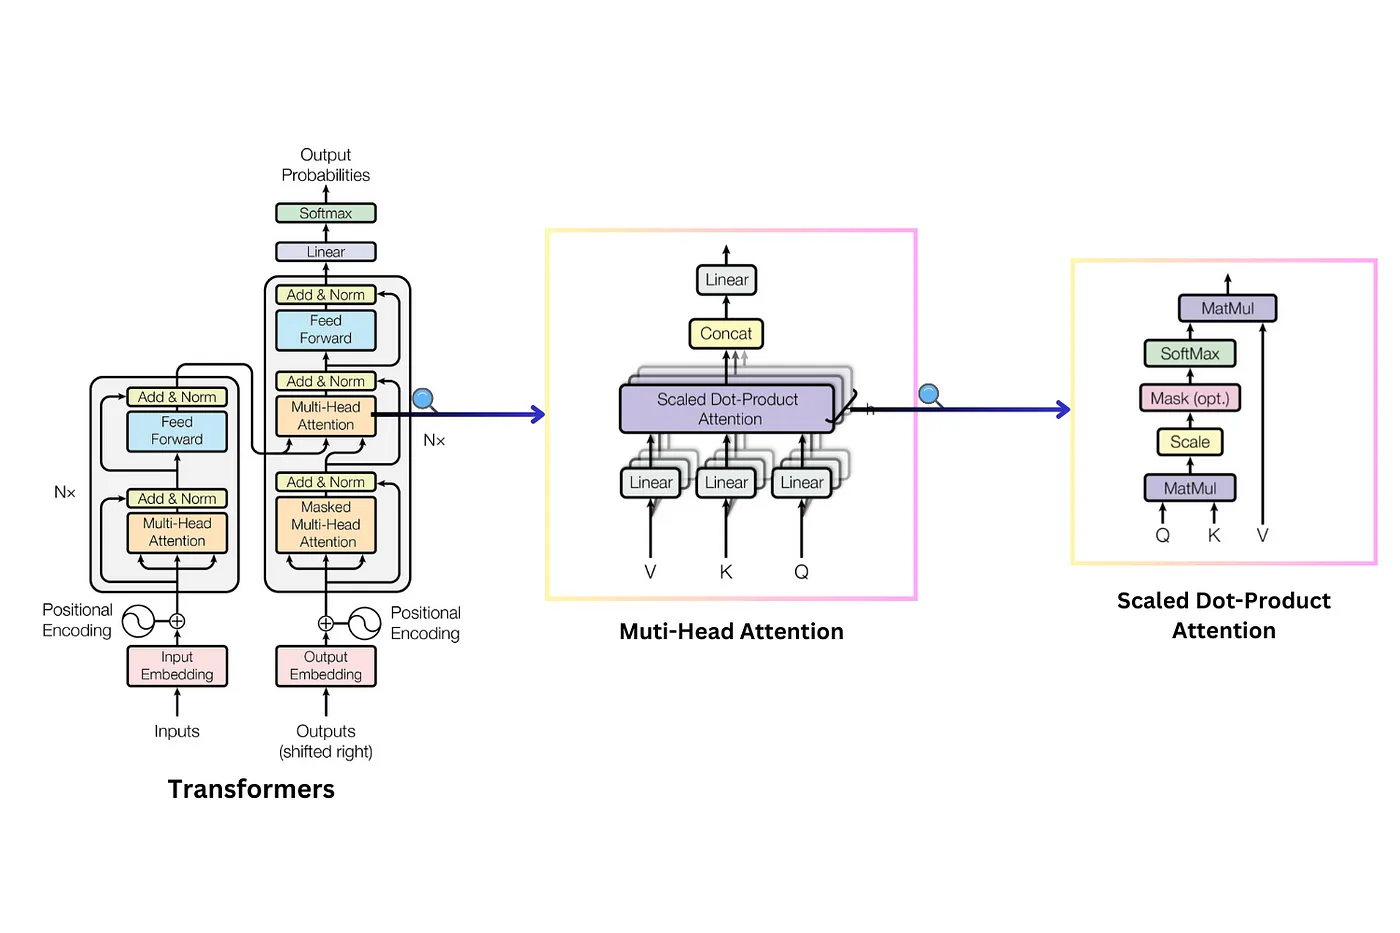

Attention 메커니즘의 주요 개념은 다음과 같습니다:

1. **Query, Key, Value**:
    - 입력 시퀀스의 각 요소는 Query, Key, Value 벡터로 변환됩니다.
    - `Query`는 현재 주목하고 있는 요소를 의미하며, `Key`는 모든 다른 요소와의 관련성을 찾는 데 사용됩니다. `Value`는 실제 정보를 포함한 벡터입니다.
    >> 벨류는 임베딩 닶. 쿼리랑 키는 벨류로 만듦. 쿼리값=키값
2. **Score 계산**:
    - Query와 Key를 이용해 관련성을 계산합니다. 일반적으로 두 벡터 간의 내적(dot product)을 통해 유사도를 구하고, 이를 정규화하여 "Score"를 얻습니다. 이때, 유사도가 높을수록 해당 요소 간의 관련성이 높다고 판단합니다.
    - Attention 메커니즘에서 **Score 계산**을 위한 내적의 수식은 다음과 같습니다.
        
        Query 벡터와 Key 벡터의 내적을 통해 유사도를 구하는 수식은 다음과 같습니다:
        
    
    $$
    
    \text{Score}(Q, K) = Q \cdot K^T
    
    $$

  >> 쿼리값과 키값은 동일하여 키값을 뒤집어서 계산해 정수를 만든다.
    
    - Vector 내적
        
        <aside>
        🧑🏻‍🎓
        
        벡터 내적(또는 **점곱**, **스칼라곱**)은 두 벡터 간의 곱셈 연산 중 하나로, 그 결과는 **스칼라**(즉, 숫자)입니다. 이 연산은 두 벡터가 얼마나 서로 "비슷한 방향"으로 향하는지를 측정하는 데 사용됩니다.
        
        두 벡터 **A**와 **B**의 내적은 다음과 같이 계산됩니다:
        
        $$
        
        A \cdot B = |A| |B| \cos \theta
        
        $$
        
        여기서:
        
        - $|A|$는 벡터 **A**의 크기(길이, 노름),
        - $|B|$는 벡터 **B**의 크기,
        - $\theta$는 두 벡터 사이의 각도입니다.
        - $\cos \theta$는 각도 $\theta$에 대한 코사인 값입니다.
        
        또한, 벡터가 성분 형태로 주어졌을 때는 다음과 같이 계산할 수 있습니다. 예를 들어, 벡터 **A**와 **B**가 각각 $n$차원의 벡터 $A = (a_1, a_2, \dots, a_n)$, $B = (b_1, b_2, \dots, b_n)$일 때, 내적은 다음 식으로 표현됩니다:
        
        $$
        
        A \cdot B = a_1 b_1 + a_2 b_2 + \dots + a_n b_n
        
        $$
        
        즉, 같은 차원의 성분끼리 곱하고 그 값을 모두 더한 것이 벡터 내적입니다.
        
        ### 예시:
        
        2차원 벡터 **A** = (3, 4)와 **B** = (2, 1)일 경우:
        
        $$
        
        A \cdot B = (3 \times 2) + (4 \times 1) = 6 + 4 = 10
        
        $$
        
        ### 벡터 내적의 의미:
        
        - $\theta = 0^\circ$ (두 벡터가 같은 방향일 때)라면 $\cos 0^\circ = 1$이므로, 내적 값은 두 벡터 크기의 곱입니다.
        - $\theta = 90^\circ$ (두 벡터가 서로 수직일 때)라면 $\cos 90^\circ = 0$ 이므로, 내적 값은 0입니다. 즉, 수직인 벡터들은 내적이 0이 됩니다.
        - 내적이 양수라면 두 벡터가 서로 비슷한 방향으로 향하고 있다는 의미이고, 음수라면 서로 반대 방향으로 향하고 있음을 나타냅니다.
        
        벡터 내적은 물리학에서 힘과 이동 거리 간의 관계를 나타내거나, 머신러닝에서 벡터 간 유사성을 측정할 때도 사용됩니다.
        
        </aside>
        
    - 여기서 ,  $Q$ 는 Query 벡터입니다. 차원은 $(1, d_k)$로 표현할 수 있습니다. $d_k$는 벡터의 차원입니다.
    - $K$ 는 Key 벡터입니다. 일반적으로 여러 개의 Key가 존재하므로 차원은 $(n, d_k)$입니다. 여기서 $n$은 Key의 개수입니다.
    - $K^T$ 는 Key 행렬의 전치 행렬로, 차원은 $(d_k, n)$입니다.
    
    두 벡터의 내적을 계산하면,  $Q$ 와  $K^T$ 의 곱셈으로 결과는 $(1, n)$ 차원의 벡터가 됩니다. 이 벡터의 각 요소는 Query와 해당 Key 간의 유사도를 나타냅니다. 이 값을 "Score"라고 부르며, 이를 이용해 각 Key의 중요도를 평가하게 됩니다.
    
    이를 수식으로 나타내면 다음과 같습니다:
    
    $$
    
    \text{Score}_i = Q \cdot K_i^T = \sum{j=1}^{d_k} Q_j \times K_{i,j}
    
    $$
    
    여기서:
    
    - $\text{Score}_i$ 는  $Q$ 와  $i$ 번째  $K$  간의 유사도입니다.
    - $Q_j$ 와  $K_{i,j}$ 는 각각 Query와 Key의  $j$ 번째 요소를 의미합니다.
    
    이렇게 계산된 Score는 Query와 각 Key 간의 유사도를 나타내며, Softmax 함수를 적용해 확률 분포로 변환된 후 Value에 대한 가중치를 계산하는 데 사용됩니다.
    
3. **Softmax 정규화**:
    - 계산된 Score는 Softmax 함수를 통해 확률 분포로 변환됩니다. 이렇게 함으로써 모든 값이 0과 1 사이에 위치하고, 합이 1이 되도록 합니다. 이 값들은 각 요소가 얼마나 중요한지 나타내는 가중치로 사용됩니다.
4. **Weighted Sum**:
    - 각 Value 벡터에 해당하는 Softmax Score를 곱하여 가중 평균을 계산합니다. 이 과정에서 중요한 요소들은 높은 가중치를 받고, 그렇지 않은 요소들은 낮은 가중치를 받게 됩니다.

이 과정을 통해 Attention 메커니즘은 시퀀스 데이터의 중요한 부분에 더 집중할 수 있게 되며, 문맥이나 연관성을 더 잘 반영할 수 있습니다.

트랜스포머 모델에서 Self-Attention 메커니즘은 입력 시퀀스 내의 모든 단어가 서로 어떤 관련이 있는지 고려할 수 있게 하여 병렬 처리를 가능하게 하고, 더 나은 성능을 제공합니다. 또한, 다양한 형태의 Attention(예: Multi-Head Attention) 기법이 사용되어, 모델이 여러 관점에서 문맥을 이해하도록 돕습니다.

**주요 이점**:

- Attention은 시퀀스 길이에 관계없이 중요한 정보에 집중할 수 있어 장기 의존성(long-range dependency) 문제를 해결하는 데 유리합니다.
- RNN과 달리, 병렬 처리가 가능하여 학습 속도가 빠릅니다.

**Self-Attention의 수식 표 현**:
Self-Attention의 경우, 입력 시퀀스를 행렬 형태로 나타내고 각 행렬을 Query, Key, Value로 변환하여 다음과 같은 과정을 거칩니다.

1.  $Q = XW_Q, K = XW_K, V = XW_V$
2. Score 계산:  $\text{Score}(Q, K) = QK^T / \sqrt{d_k}$   (여기서 $d_k$  는 차원의 크기)
3. Softmax 정규화:  $\text{Attention Weights} = \text{softmax}(\text{Score})$
4. 가중 합산:  $\text{Output} = \text{Attention Weights} \times V$

다음은 한국어 문자열에 대한 Attrntion 메커니즘의 예시입니다.

먼저 입력 문자열을 임베딩 벡터로 변환 합니다. 이를 위해, `KoNLPy` 를 사용해 형태소 분석을 실시하여 토큰화한 후, 각 토큰을 벡터로 변환합니다. 여기서는 `BERT` 를 이용해 임베딩을 사용할 수 있습니다. 다음은 간단하게 `KoNLPy`로 토큰화하고, BERT 임베딩을 통해 벡터로 변환하여 Attention을 적용합니다.

In [ ]:
# 코랩에서 한글 불러오는 인스톨. 실행 후 돌리려는 셀을 다시시작하면 적용함.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install transformers
!pip install konlpy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from konlpy.tag import Okt
import torch
from transformers import BertModel, BertTokenizer

# 한글 폰트 설정
font_path = '/content/NanumBarunGothic.ttf'  # 나눔바른고딕 폰트 파일 경로
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# BERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 입력 문장 토큰화 및 임베딩 벡터 생성
input_sentence = "안녕하세요, 오늘 날씨가 참 좋네요."
okt = Okt()
tokens = okt.morphs(input_sentence)

# BERT 토크나이저를 이용하여 토큰을 인덱스로 변환
inputs = tokenizer(tokens, return_tensors='pt', padding=True, is_split_into_words=True)

# BERT 모델을 통해 임베딩 생성
with torch.no_grad():
    outputs = model(**inputs)
    # 마지막 히든 스테이트에서 각 토큰의 임베딩 벡터를 추출
    embeddings = outputs.last_hidden_state[0]

# Query, Key, Value 벡터 생성 (BERT 임베딩 사용)
query = embeddings.numpy()
key = embeddings.numpy()
value = embeddings.numpy()

# Softmax 함수 정의
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

# Attention 함수 정의
def attention(query, key, value):
    score = np.dot(query, key.T)  # Query와 Key 간의 유사도 계산, 여기서 모두 같은 문장이 입력되어 유사도를 비교하기 때문에 즉 자기 자신의 유사도를 측정하기 때문에 Self Attention이라고 한다.
    d_k = query.shape[-1]
    scaled_score = score / np.sqrt(d_k)  # 스케일링
    attention_weights = softmax(scaled_score)  # Softmax 정규화
    output = np.dot(attention_weights, value)  # 가중합 계산
    return output, attention_weights

# Attention 계산
output, weights = attention(query, key, value)

# Attention Weights 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=True, fmt=".2f", cmap='Blues', xticklabels=tokens, yticklabels=tokens, cbar=True)
plt.xlabel('Key Tokens')
plt.ylabel('Query Tokens')
plt.title('Attention Weights Heatmap')
plt.show()

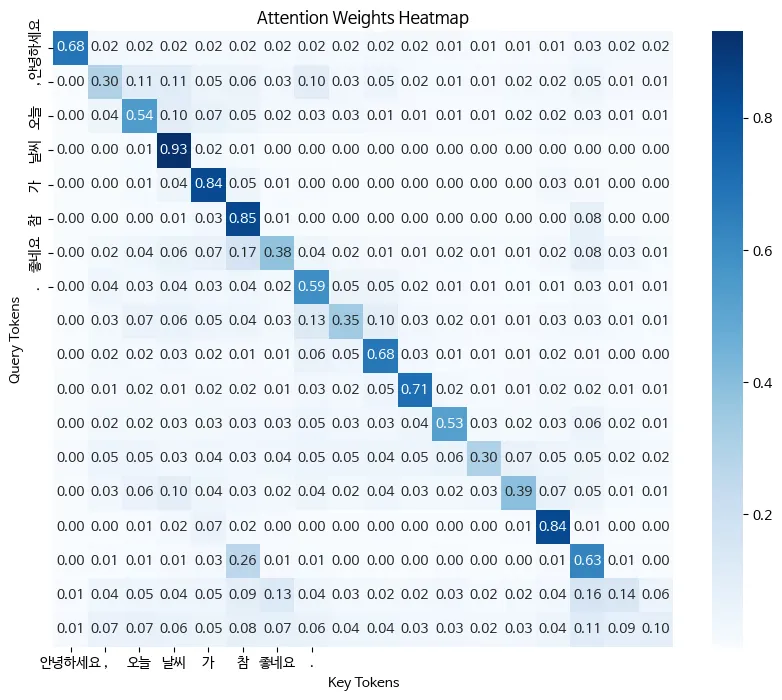

위 히트맵은 입력 문장 `"안녕하세요, 오늘 날씨가 참 좋네요."`에 대해 BERT 모델로 생성된 임베딩 벡터들 간의 자기 어텐션(Self-Attention) 가중치를 시각화한 것입니다. 각 행과 열은 문장 내의 토큰을 나타내며, 행은 쿼리 토큰(Query Tokens), 열은 키 토큰(Key Tokens)입니다. 셀의 값은 각 쿼리 토큰이 각 키 토큰에 얼마나 주의를 기울이는지를 나타내는 어텐션 가중치입니다.

1. **"안녕하세요" (첫 번째 행, 첫 번째 열 = 0.68)**
    - `"안녕하세요"`는 자기 자신에게 가장 높은 가중치(0.68)를 부여하고 있어, 자기 자신에 집중하고 있습니다. 다른 토큰들과의 관계는 매우 약합니다.
2. **"오늘" (세 번째 행, 세 번째 열 = 0.54)**
    - `"오늘"`은 자기 자신에 대한 어텐션 가중치가 0.54로 가장 높습니다. 이는 `"오늘"`이라는 시간 표현이 문맥상 자신과 가장 강하게 연결되어 있음을 의미합니다.
3. **"날씨" (네 번째 행, 네 번째 열 = 0.93)**
    - `"날씨"`는 자기 자신에게 가장 높은 가중치(0.93)를 부여하고 있습니다. 이는 `"날씨"`가 문맥적으로 명확한 대상이기 때문에, 다른 단어들보다 자기 자신에 대한 주의가 큽니다.
4. **"참" (다섯 번째 행, 다섯 번째 열 = 0.85)**
    - `"참"`은 자기 자신에 대해 가장 높은 가중치(0.85)를 부여하고 있습니다. 이는 `"참"`이 수식어로서 문장에서 독립적인 중요성을 갖고 있으며 자기 자신을 중심으로 의미를 형성하고 있다는 것을 보여줍니다.
5. **"좋네요" (여섯 번째 행, 여섯 번째 열 = 0.38)**
    - `"좋네요"`는 자기 자신에 대한 어텐션 가중치가 0.38로 상대적으로 낮으며, 대신 `"날씨"`와 `"참"`에 대해서도 일부 가중치를 부여하고 있습니다. 이는 `"좋네요"`가 문장의 의미를 이해하기 위해 앞서 나온 명사와 수식어에 주의를 기울이고 있음을 의미합니다.
6. **구두점 (마지막 행)**
    - 구두점은 전체적으로 다른 토큰들과의 관계가 약하고, 가중치가 고르게 낮게 분포되어 있습니다. 이는 문장에서 구두점이 다른 단어들과의 연관성이 적다는 것을 보여줍니다.

요약하자면:

- 대부분의 토큰은 자기 자신에게 높은 어텐션 가중치를 부여하며, 이는 BERT 모델이 각 단어의 독립적인 중요성을 인식하고 있음을 나타냅니다.
- "좋네요"의 어텐션 가중치가 상대적으로 낮은 이유와 다른 단어들에 영향을 준다는 부분에 대해 좀 더 명확히 설명드리겠습니다.

**"좋네요"의 낮은 가중치 설명**

- `"좋네요"`라는 토큰의 **자기 자신에 대한 어텐션 가중치가 0.38**로 낮은 것은, 해당 단어가 문장의 맥락에서 그 자체로 중요한 역할을 하지 않는다는 것을 의미합니다. 즉, `"좋네요"`는 형용사로서 문장에서 감정을 표현하는 기능을 하지만, 문장의 중심적 의미를 형성하는 `"날씨"`와 같은 명사에 비해 독립적으로 중요도가 낮다는 것입니다.
- `"좋네요"`는 `"날씨"`와 `"참"`에 의존하여 의미를 형성합니다. 예를 들어, `"좋네요"`의 의미는 `"날씨"`의 상태를 나타내기 위해 사용되며, 단독으로 의미를 지닌다기보다는 `"날씨"`라는 맥락을 필요로 합니다. 따라서 `"좋네요"`는 다른 단어들보다 자기 자신에 대한 주의가 낮게 배정되었습니다.

**문맥적 의존성**

- `"좋네요"`의 가중치가 다른 단어들에 영향을 준다고 설명한 부분은 `"좋네요"`가 직접적으로 높은 어텐션 가중치를 부여받기보다는, 그 의미가 앞선 `"날씨"`와 `"참"`에 의해 형성된다는 점을 강조한 것이었습니다.
- 즉, `"좋네요"`는 앞선 명사와 수식어가 있어야 그 의미가 완성되므로, BERT 모델은 `"좋네요"` 자체보다 앞의 토큰들에 더 주목합니다. 어텐션 값이 낮다는 것은 `"좋네요"`가 단독으로 중요한 정보를 제공하기보다는, 문맥적으로 다른 단어와의 관계에서 의미가 만들어짐을 의미합니다.

<aside>
🧑🏻‍🎓

BERT를 이용해 텍스트를 임베딩하면 각 단어 혹은 토큰에 대해 실수 벡터(예: 768차원)값이 생성됩니다. 이 벡터값은 해당 토큰의 의미를 고차원 공간에서 표현한 것으로, 문맥적인 의미와 단어 간의 관계를 반영합니다. 이 벡터를 계산하고 부여하는 과정에는 특정 기준과 방식이 있습니다.

**1. 벡터 계산의 기준**

BERT에서 각 벡터를 부여하는 과정은 학습된 파라미터와 입력 문장의 맥락에 따라 달라집니다. 다음과 같은 기준이 있습니다:

- **훈련된 파라미터**: BERT는 대량의 텍스트 데이터에 대해 사전 학습(pre-training)을 통해 언어의 패턴, 문맥, 의미 관계 등을 학습합니다. 이 과정에서 모델의 가중치가 최적화되며, 이는 이후 벡터를 계산하는 데 영향을 줍니다. 예를 들어, BERT가 사전 학습을 통해 `"날씨"`와 `"좋네요"` 같은 단어들의 관계를 이해했다면, 이를 반영해 각 단어의 임베딩 벡터를 계산합니다.
- **문맥의존적 임베딩**: BERT의 특징은 문맥적 임베딩을 제공한다는 점입니다. 동일한 단어라도 문맥에 따라 다른 임베딩 벡터값을 갖습니다. 예를 들어 `"날씨"`라는 단어가 다른 문장에서 다른 의미로 쓰였을 때, 벡터값이 다르게 나타날 수 있습니다. 이는 BERT가 각 단어의 의미를 해당 문장의 맥락에 따라 동적으로 계산하기 때문입니다.

**2. BERT에서 벡터 계산 방식의 일관성**

- **동일한 입력에 대해 일관된 결과**: BERT 모델은 동일한 입력 문장에 대해 항상 동일한 벡터값을 출력합니다. 이는 모델이 결정론적(deterministic)이기 때문입니다. 즉, 학습된 파라미터와 입력이 같으면 언제나 같은 출력을 제공합니다.
- **BERT 모델 간의 차이**: 동일한 BERT 모델(예: `bert-base-multilingual-cased`)을 사용하는 경우, 같은 입력에 대해서는 동일한 벡터를 생성합니다. 하지만 사전 학습된 가중치가 다른 BERT 모델(예: `bert-large` vs `bert-base`)을 사용하는 경우, 같은 문장이라도 다른 벡터값을 생성할 수 있습니다. 이는 각 모델이 학습한 가중치와 크기가 다르기 때문입니다.

**3. 벡터 계산 과정**

BERT에서 실수 벡터값을 계산하는 과정은 다음과 같습니다:

- **토크나이징**: 입력 문장은 BERT 토크나이저에 의해 토큰으로 분할되고, 각 토큰은 고유한 정수 인덱스로 변환됩니다.
- **임베딩 레이어**: 각 토큰 인덱스는 임베딩 레이어를 통해 고차원 벡터로 변환됩니다. 이때 벡터는 `token embeddings`, `position embeddings`, `segment embeddings`의 합으로 구성됩니다.
- **트랜스포머 레이어**: 입력 벡터는 다수의 트랜스포머 레이어를 거치며, 각 레이어에서 어텐션 메커니즘과 피드포워드 네트워크를 통해 벡터가 업데이트됩니다. 각 레이어에서의 벡터값은 해당 토큰의 문맥적 정보를 점진적으로 반영한 결과입니다.
- **출력 임베딩**: 마지막 트랜스포머 레이어의 출력 벡터가 최종 임베딩으로 사용됩니다. 이 벡터는 입력 문장의 문맥을 반영한 실수 벡터입니다.

**4. 벡터의 동일성과 차별성**

- **동일 문맥에서 일관성**: 동일한 문맥에서 동일한 BERT 모델을 사용할 경우, 해당 단어에 대한 벡터는 항상 일관되게 생성됩니다.
- **문맥에 따른 차별성**: 같은 단어라도 문맥이 다르면 다른 벡터를 생성합니다. 예를 들어, `"bank"`라는 단어가 "river bank"와 "financial bank"에서 사용될 때, BERT는 문맥을 반영해 다른 임베딩 벡터를 생성합니다.

따라서, BERT가 각 벡터에 부여하는 기준은 사전 학습된 가중치, 입력된 문맥, 그리고 모델 구조에 기반하며, 이 기준은 동일한 모델에 대해서만 일관성을 가집니다. 다른 모델이나 다른 맥락에서는 계산된 벡터값이 달라질 수 있습니다.

</aside>